Using randoms and Monte Carlo Methods to calculate PI

In [34]:
import numpy as np
import cmath as cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from random import seed
from random import random 

## Monte Carlo

3.167833566713343


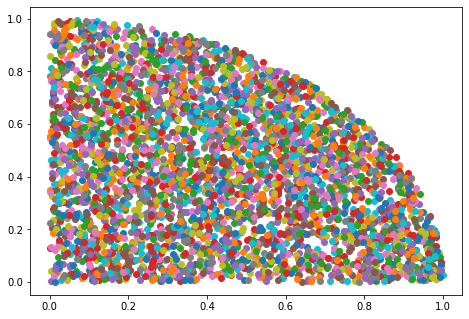

In [10]:
# ** approximating PI**
counts = 0
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for loops in range (1,5000):
    x,y = np.random.random(2)
    if(x**2 +y**2)<1:
        counts += 1
        ax.plot(x,y,'o')
        
myPi = 4*counts/loops
print(myPi)


88.97329732973297


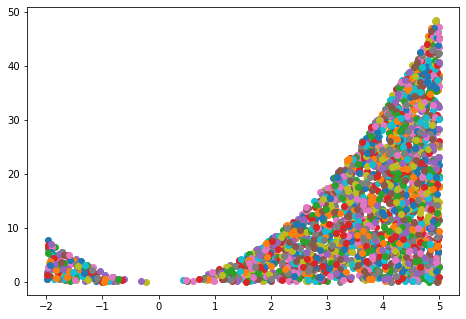

In [26]:
# Monte caro integration**, y = 2x^2 from -2 to 5 in x, answ = 88.6666666*
counts = 0
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for loops in range (1,10000):
    x = np.random.uniform(-2,5)
    y = np.random.uniform(0,51)
    
    if (y<2*x**2):
        counts += 1
        ax.plot(x,y,'o')
        
intTotal = counts/loops *7*51 # number of count / number of loops times the two ranges
print(intTotal)

## Random Walk

Distance:  66.803256298892
Root N:  70.70360669725413


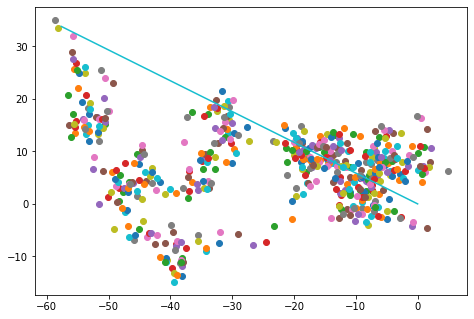

In [24]:
# Random Walk
x= 0
y = 0

counts = 0
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for loops in range (1,5000):
    xi = np.random.uniform(-1,1)
    yi = np.random.uniform(-1,1)
    x = x+xi
    y += yi
    
    if loops %10 == 0:
        ax.plot(x,y,'o')

ax.plot([0,x],[0,y])

print("Distance: ", (x**2+y**2)**.5)
print("Root N: ", loops**0.5)

## Ising Model



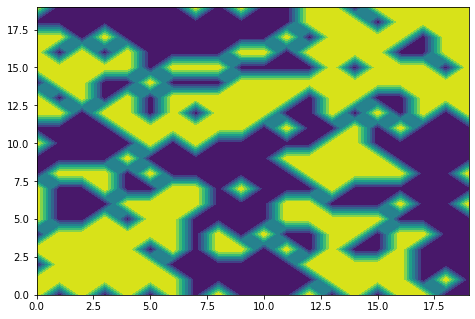

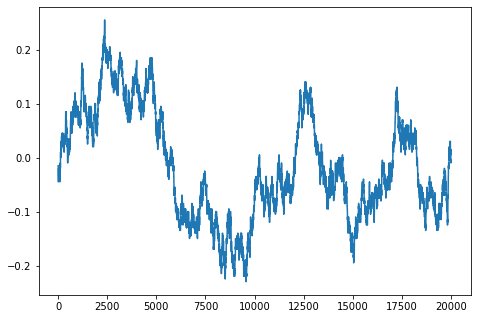

In [73]:
def nearNeighbour(lattice, x,  y):
    ysize, xsize=lattice.shape
    left=lattice[y, (x-1)]# Use % for periodic 
    
    right=lattice[y, (x+1)%xsize]# Index "N" = 0
    under=lattice[(y-1), x]
    over=lattice[(y+1)%ysize, x]
    return np.array([left, right, under, over])

def energy(lattice, x, y):
    summed=-lattice[x,y]*np.sum(nearNeighbour(lattice, x, y))
    return strength*summed


N=20# Lattice size
strength=1
spinFlips=20000# Initialize 
spinsspinArray=[-1,1]
spinLattice=np.random.choice(spinArray, [N,N])
totalMag=np.zeros(spinFlips)
T=1.5

for flips in range(0,spinFlips):
    i, j=np.random.randint(0, N,2)
    E=energy(spinLattice, j, i)
    if E>=0:
        spinLattice[j, i]=-1.0*spinLattice[j, i]
    elif np.random.random()<np.exp(E/T):
        spinLattice[j, i]=-1.0*spinLattice[j, i]
            
    totalMag[flips]=np.sum(spinLattice)/N**2
        
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
contr=plt.contourf(np.arange(0,N), np.arange(0,N), spinLattice)

fig=plt.figure()# Create a figure object
ax=fig.add_axes([0,0,1,1])# Adds axes, box at 0,0 with 100% length and width
ax.plot(np.arange(0, spinFlips),totalMag)

